# Bank Marketing

## 1. 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew

In [2]:
train = pd.read_csv('bank-full.csv')
test = pd.read_csv('bank_test.csv')
submission = pd.read_csv('submission.csv')

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


In [7]:
submission.head()

,y
0,0
1,0
2,0
3,0
4,0


In [8]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       4521 non-null   int64
dtypes: int64(1)
memory usage: 35.4 KB


# 2. EDA

### Target

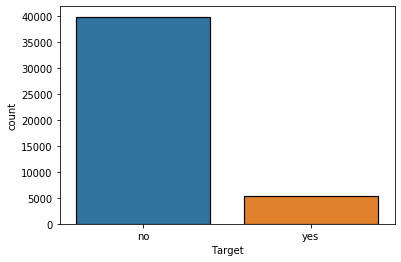

In [9]:
sns.countplot(train.y,edgecolor = (0,0,0),linewidth = 1.2)
plt.xlabel('Target')
plt.show()

#### Class의 분포의 차이가 매우 심한 것을 알 수 있다.

In [10]:
train.y = train.y.map({'no' : 0, 'yes' : 1})

### 2-1. AGE

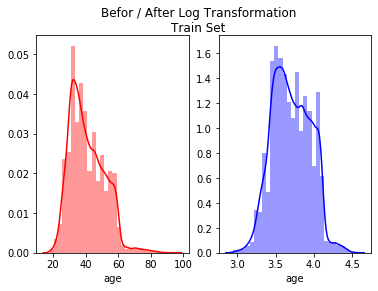

In [11]:
f, ax = plt.subplots(1,2)
f.suptitle('Befor / After Log Transformation\nTrain Set')
sns.distplot(train.age,color = 'r', hist = True,bins = 30, ax = ax[0])
sns.distplot(np.log1p(train.age),color = 'b', hist = True,bins = 30,ax = ax[1])

plt.show()

In [12]:
skew(train.age)

0.6847952047866451

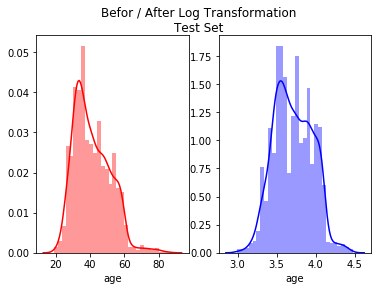

In [13]:
f, ax = plt.subplots(1,2)
f.suptitle('Befor / After Log Transformation\nTest Set')
sns.distplot(test.age,color = 'r', hist = True,bins = 30, ax = ax[0])
sns.distplot(np.log1p(test.age),color = 'b', hist = True,bins = 30,ax = ax[1])

plt.show()

In [14]:
skew(test.age)

0.6992693478711453

In [15]:
train.age = np.log1p(train.age)
test.age = np.log1p(test.age)

In [16]:
display(skew(train.age))
display(skew(test.age))

0.11275353897024878

0.12884353558629738

#### age의 왜도가 줄어들어 정규분포에 근사한 형태로 변환된 것을 알 수 있다.

### 2-2. JOB

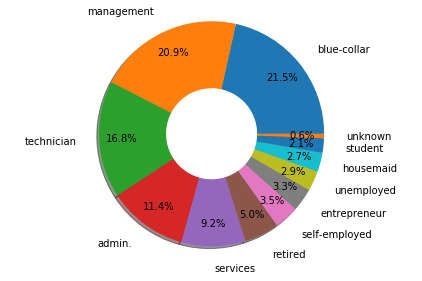

In [17]:
train.job.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .8, startangle=0,labeldistance=1.2)
plt.ylabel(None)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.40,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

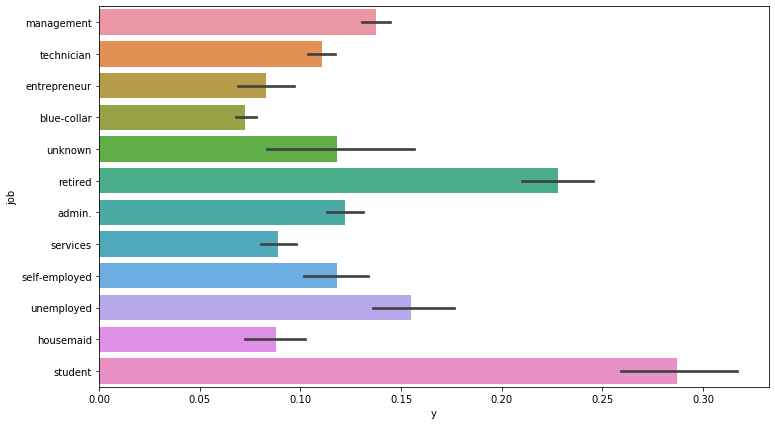

In [18]:
plt.figure(figsize = (12,7))
sns.barplot(y = 'job', x = 'y', data = train)
plt.show()

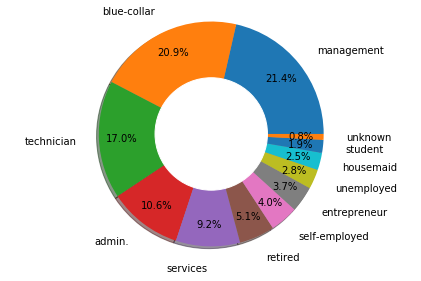

In [19]:
test.job.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .8, startangle=0,labeldistance=1.2)
plt.ylabel(None)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

In [20]:
train = pd.get_dummies(train,columns = ['job'])
test = pd.get_dummies(test,columns = ['job'])

### 2-3. MARITAL

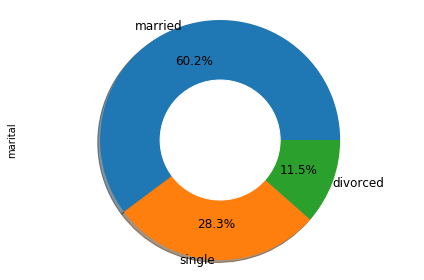

In [21]:
train.marital.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .7, startangle = 0, labeldistance = 1, fontsize = 12)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

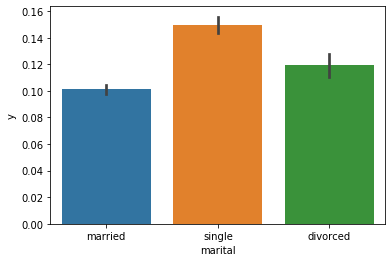

In [22]:
sns.barplot(x = 'marital', y = 'y', data = train)
plt.show()

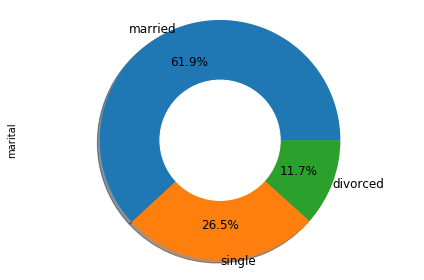

In [23]:
test.marital.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .7, startangle = 0, labeldistance = 1, fontsize = 12)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

In [24]:
train = pd.get_dummies(train,columns = ['marital'])
test = pd.get_dummies(test,columns = ['marital'])

### 2-4. EDUCATION

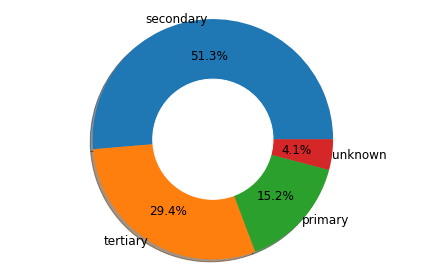

In [25]:
train.education.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .7, startangle = 0, labeldistance = 1, fontsize = 12)
plt.ylabel(None)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

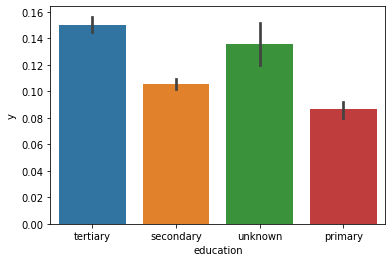

In [26]:
sns.barplot(x = 'education', y = 'y', data = train)
plt.show()

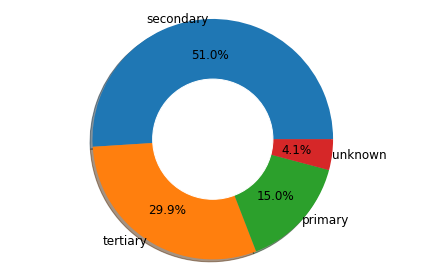

In [27]:
test.education.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .7, startangle = 0, labeldistance = 1, fontsize = 12)
plt.ylabel(None)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

In [28]:
train = pd.get_dummies(train,columns = ['education'])
test = pd.get_dummies(test,columns = ['education'])

### 2-5. DEFAULT

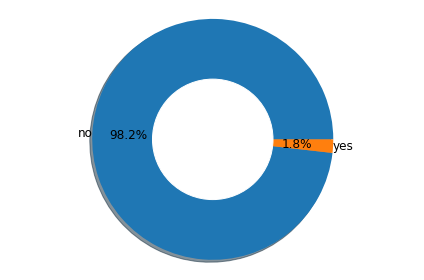

In [29]:
train.default.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .7, startangle = 0, labeldistance = 1, fontsize = 12)
plt.ylabel(None)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

#### 극소수의 데이터만 yes에 해당하므로 더미화 보다는 정수형타입으로 데이터 타입을 변경하겠습니다.

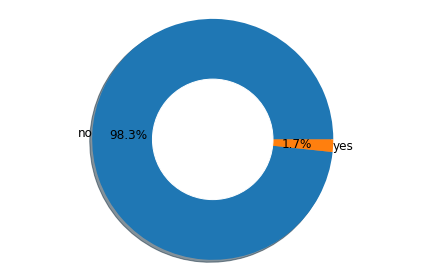

In [30]:
test.default.value_counts().plot.pie(autopct = '%1.1f%%',shadow=True,pctdistance = .7, startangle = 0, labeldistance = 1, fontsize = 12)
plt.ylabel(None)
plt.axis('equal')
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)
plt.show()

In [31]:
train.default = train.default.map({'yes' : 1, 'no' : 0})

In [32]:
test.default = test.default.map({'yes' : 1, 'no' : 0})

### 2-6. BALANCE

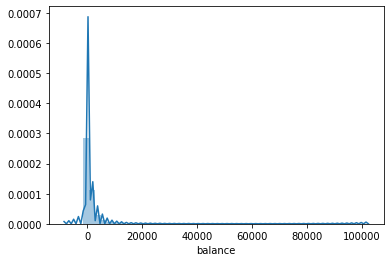

In [33]:
sns.distplot(train.balance)
plt.show()

In [34]:
skew(train.balance)

8.360030947252687

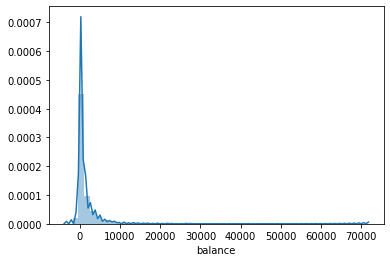

In [35]:
sns.distplot(test.balance)
plt.show()

In [36]:
skew(test.balance)

6.5942417478272635

In [37]:
train.balance.min()

-8019

In [38]:
test.balance.min()

-3313

#### train과 test 모두 balance의 최솟값이 큰 음수값을 가지므로 로그 변환이 아닌 스케일링을 실시한다.

### 2-7. HOUSING

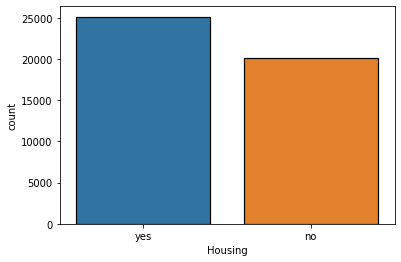

In [39]:
sns.countplot(train.housing,edgecolor = (0,0,0),linewidth = 1.2)
plt.xlabel('Housing')
plt.show()

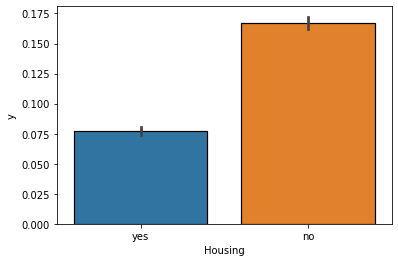

In [40]:
sns.barplot(x = 'housing', y = 'y', data = train,edgecolor = (0,0,0),linewidth = 1.2)
plt.xlabel('Housing')
plt.show()

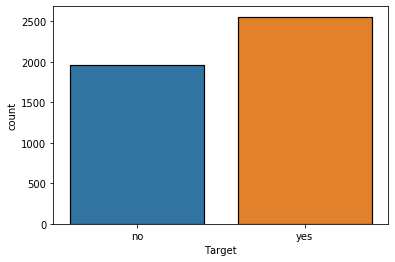

In [41]:
sns.countplot(test.housing,edgecolor = (0,0,0),linewidth = 1.2)
plt.xlabel('Target')
plt.show()

In [42]:
train = pd.get_dummies(train,columns = ['housing'])
test = pd.get_dummies(test,columns = ['housing'])

### 2-8. LOAN

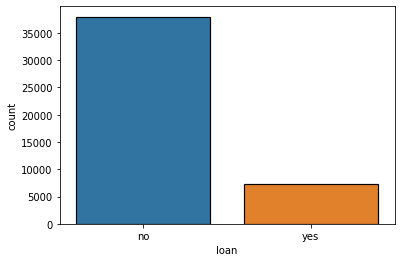

In [43]:
sns.countplot(train.loan, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

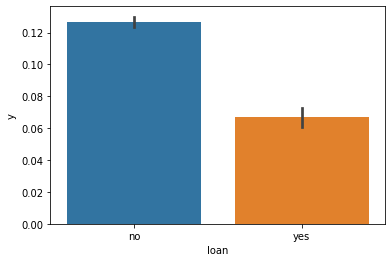

In [44]:
sns.barplot(x = 'loan', y = 'y', data = train)
plt.show()

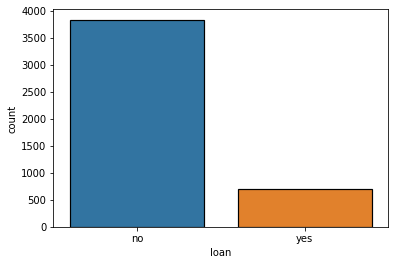

In [45]:
sns.countplot(test.loan, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

In [46]:
train = pd.get_dummies(train, columns = ['loan'])
test = pd.get_dummies(test, columns = ['loan'])

### 2-9. CONTACT

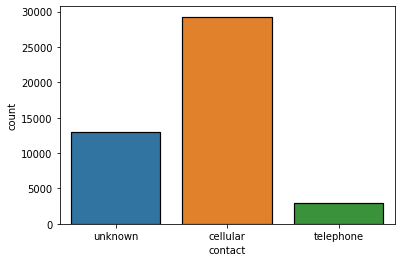

In [47]:
sns.countplot(train.contact, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

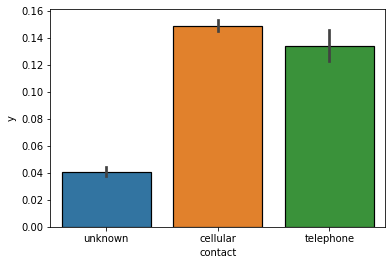

In [48]:
sns.barplot(x = 'contact', y = 'y', data = train, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

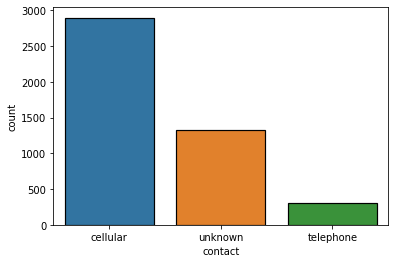

In [49]:
sns.countplot(test.contact, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

In [50]:
train = pd.get_dummies(train, columns = ['contact'])
test = pd.get_dummies(test, columns = ['contact'])

### 2-10. DAY

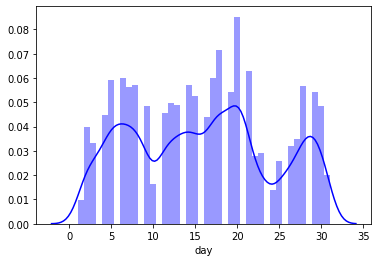

In [51]:
sns.distplot(train.day, color = 'b')
plt.show()

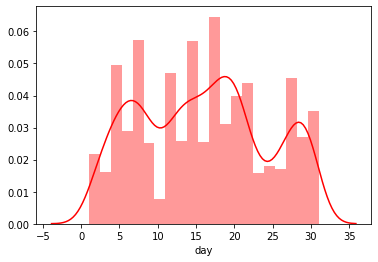

In [52]:
sns.distplot(test.day, color = 'r')
plt.show()

#### 단 / 중 / 장기로 나누어 보겠습니다.

In [53]:
train.day = pd.cut(train.day, 3, labels = ['단기','중기','장기'])
train.day.value_counts()

중기    18936
단기    15204
장기    11071
Name: day, dtype: int64

In [54]:
test.day = pd.cut(test.day, 3, labels = ['단기','중기','장기'])
test.day.value_counts()

중기    1923
단기    1488
장기    1110
Name: day, dtype: int64

In [55]:
train = pd.get_dummies(train, columns = ['day'])
test = pd.get_dummies(test, columns = ['day'])

## 2-11. MONTH

In [56]:
order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

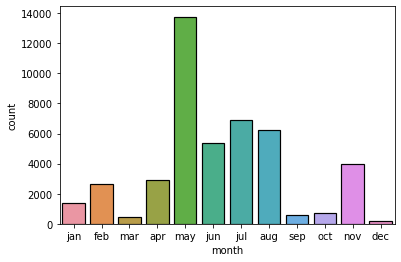

In [57]:
sns.countplot(train.month,order = order,edgecolor = (0,0,0),linewidth = 1.2)
plt.show()

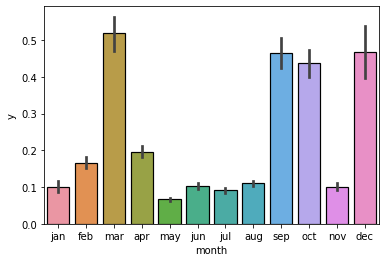

In [58]:
sns.barplot(x = 'month', y = 'y', data = train, order = order,edgecolor = (0,0,0),linewidth = 1.2)
plt.show()

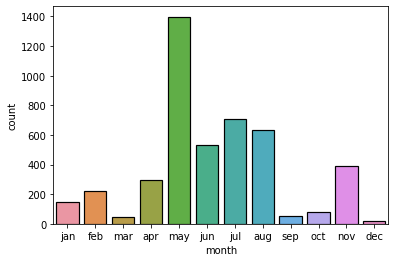

In [59]:
sns.countplot(test.month,order = order,edgecolor = (0,0,0),linewidth = 1.2)
plt.show()

In [60]:
def month_y(x):
    if x in ['mar', 'sep','oct','dec']:
        return 2
    elif x in ['feb', 'apr']:
        return 1
    else : 
        return 0

In [61]:
train.month = train.month.apply(month_y)
test.month = test.month.apply(month_y)

## 2-12. DURATION

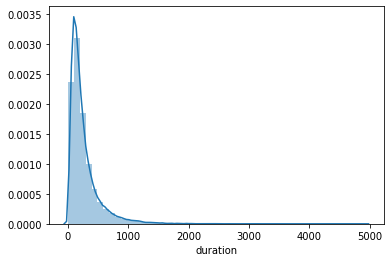

3.1442137770103913

In [62]:
sns.distplot(train.duration)
plt.show()
display(skew(train.duration))

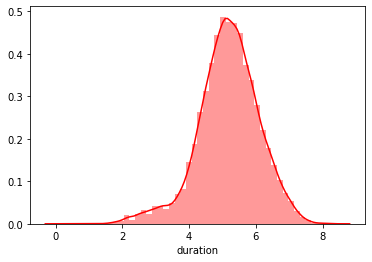

-0.45414915618237045

In [63]:
sns.distplot(np.log1p(train.duration), color = 'r')
plt.show()
display(skew(np.log1p(train.duration)))

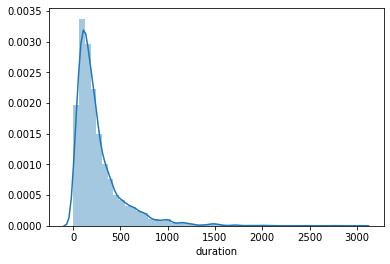

2.7714997848401164

In [64]:
sns.distplot(test.duration)
plt.show()
display(skew(test.duration))

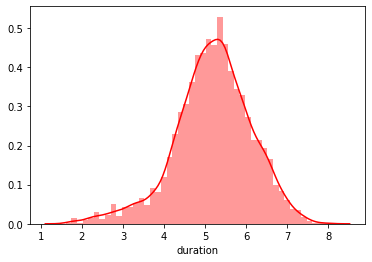

-0.46771892206575705

In [65]:
sns.distplot(np.log1p(test.duration),color = 'r')
plt.show()
display(skew(np.log1p(test.duration)))

In [66]:
train.duration = np.log1p(train.duration)
test.duration = np.log1p(test.duration)

## 2-13. CAMPAIGN

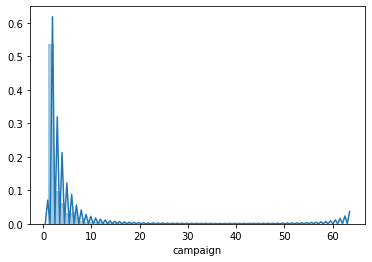

4.898487638410557

In [67]:
sns.distplot(train.campaign)
plt.show()
display(skew(train.campaign))

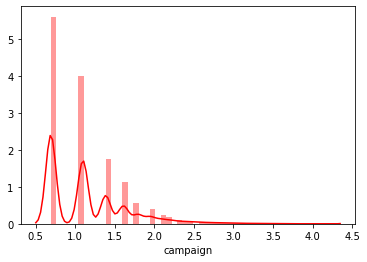

1.3261778049175654

In [68]:
sns.distplot(np.log1p(train.campaign), color = 'r')
plt.show()
display(skew(np.log1p(train.campaign)))

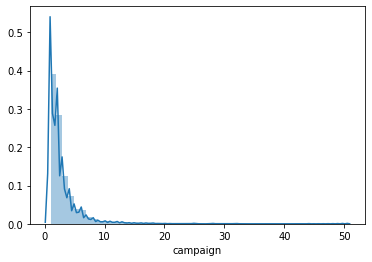

4.742340364181248

In [69]:
sns.distplot(test.campaign)
plt.show()
display(skew(test.campaign))

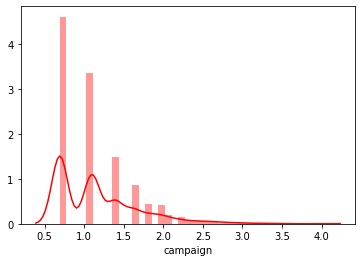

1.3052397805681089

In [70]:
sns.distplot(np.log1p(test.campaign), color = 'r')
plt.show()
display(skew(np.log1p(test.campaign)))

In [71]:
train.campaign = np.log1p(train.campaign)
test.campaign = np.log1p(test.campaign)

### 2-14. PDAYS

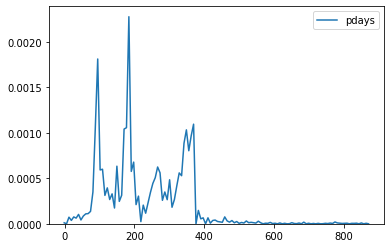

2.615628689259389

In [72]:
sns.kdeplot(train.pdays, cumulative=False, bw=.1)
plt.show()
display(skew(train.pdays))

C:\Users\ksh\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ksh\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


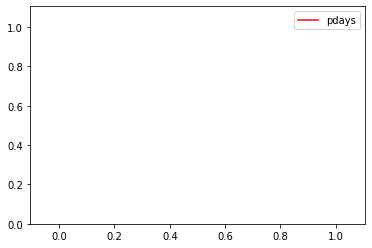

C:\Users\ksh\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ksh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


nan

In [73]:
sns.kdeplot(np.log1p(train.pdays), cumulative=False, bw=.1, color = 'r')
plt.show()
display(skew(np.log1p(train.pdays)))

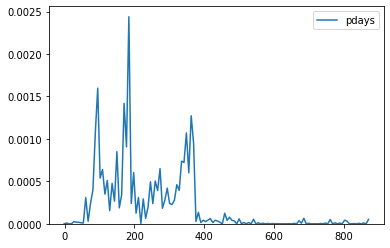

2.7161697999359666

In [74]:
sns.kdeplot(test.pdays, cumulative=False, bw=.1)
plt.show()
display(skew(test.pdays))

C:\Users\ksh\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ksh\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


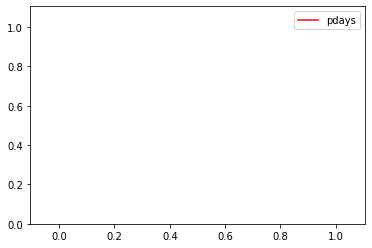

C:\Users\ksh\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ksh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


nan

In [75]:
sns.kdeplot(np.log1p(test.pdays), cumulative=False, bw=.1, color = 'r')
plt.show()
display(skew(np.log1p(test.pdays)))

### pdays 변수는 음수값이 존재하는데 데이터 설명도 없어 쉽게 변환이 불가능해 스케일링을 하기로 결정.

### 2-15. PREVIOUS

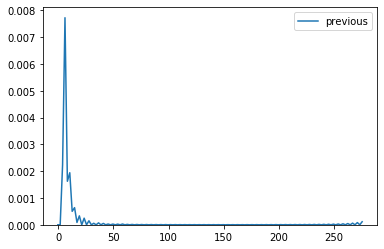

41.84506608797322

In [76]:
sns.kdeplot(train.previous, cumulative=False, bw=.1)
plt.show()
display(skew(train.previous))

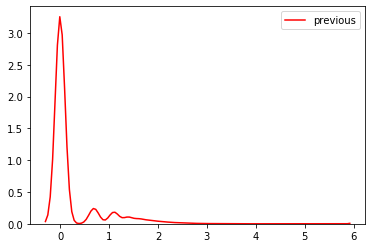

2.5160829676197487

In [77]:
sns.kdeplot(np.log1p(train.previous), cumulative=False, bw=.1, color = 'r')
plt.show()
display(skew(np.log1p(train.previous)))

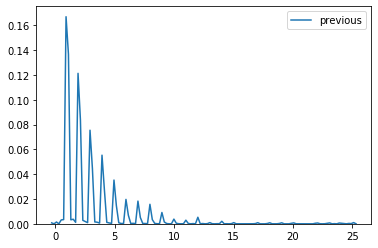

5.873309175494491

In [78]:
sns.kdeplot(test.previous, cumulative=False, bw=.1)
plt.show()
display(skew(test.previous))

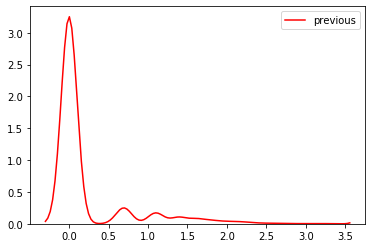

2.464276730254832

In [79]:
sns.kdeplot(np.log1p(test.previous), cumulative=False, bw=.1, color = 'r')
plt.show()
display(skew(np.log1p(test.previous)))

In [80]:
train.previous = np.log1p(train.previous)
test.previous = np.log1p(test.previous)

### 2-16. POUTCOME

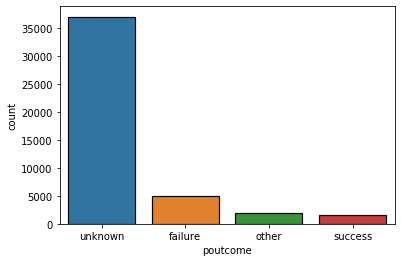

In [81]:
sns.countplot(train.poutcome, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

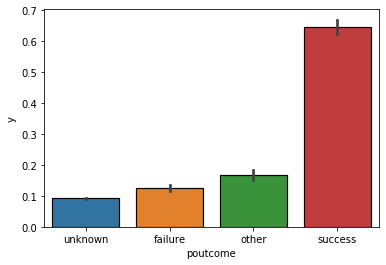

In [82]:
sns.barplot(x = 'poutcome', y = 'y', data = train, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

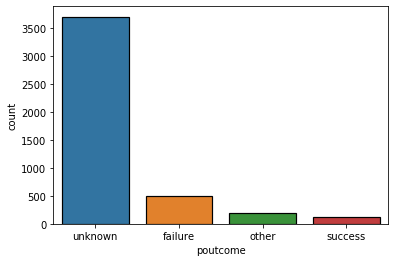

In [83]:
sns.countplot(test.poutcome, edgecolor = (0,0,0), linewidth = 1.2)
plt.show()

In [84]:
train = pd.get_dummies(train, columns = ['poutcome'])
test = pd.get_dummies(test, columns = ['poutcome'])

### *** 스케일링 ***

In [85]:
from sklearn.preprocessing import *

In [86]:
scaler = MinMaxScaler()

In [87]:
scaled_df = scaler.fit_transform(train[['balance','pdays']])

In [88]:
train = train.drop(['balance','pdays'], axis = 1)

In [89]:
train = pd.concat([train, pd.DataFrame(scaled_df)], axis = 1)

In [90]:
train.head()

,age,default,month,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,contact_unknown,day_단기,day_중기,day_장기,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,0,1
0,4.077537,0,0,5.568345,0.693147,0.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0.092259,0.0
1,3.806662,0,0,5.023881,0.693147,0.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0.073067,0.0
2,3.526361,0,0,4.343805,0.693147,0.0,0,0,0,1,...,1,1,0,0,0,0,0,1,0.072822,0.0
3,3.871201,0,0,4.532599,0.693147,0.0,0,0,1,0,...,1,1,0,0,0,0,0,1,0.086476,0.0
4,3.526361,0,0,5.293305,0.693147,0.0,0,0,0,0,...,1,1,0,0,0,0,0,1,0.072812,0.0


In [91]:
test_scaled = scaler.transform(test[['balance','pdays']])

In [92]:
test = test.drop(['balance','pdays'], axis = 1)

In [93]:
test = pd.concat([test, pd.DataFrame(test_scaled)], axis = 1)

In [94]:
test.head()

,age,default,month,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_unknown,day_단기,day_중기,day_장기,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,0,1
0,3.433987,0,2,4.382027,0.693147,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,1,0.089027,0.000000
1,3.526361,0,0,5.398163,0.693147,1.609438,0,0,0,0,...,0,1,0,0,1,0,0,0,0.116282,0.389908
2,3.583519,0,1,5.225747,0.693147,0.693147,0,0,0,0,...,0,0,1,0,1,0,0,0,0.085060,0.379587
3,3.433987,0,0,5.298317,1.609438,0.000000,0,0,0,0,...,1,1,0,0,0,0,0,1,0.086204,0.000000
4,4.094345,0,0,5.424950,0.693147,0.000000,0,1,0,0,...,1,1,0,0,0,0,0,1,0.072803,0.000000


## 3. MODELING

In [95]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import *

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import *
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import scikitplot as skplt
from scipy.stats.mstats import gmean

In [96]:
X = train.drop('y', axis = 1)

In [97]:
Y = train.y

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 777)

In [166]:
def fit_pred(model):
    model.fit(X_train, y_train)
    acc_pred = model.predict(X_test)
    roc_pred = model.predict_proba(X_test)[:, 1]
    print('정확도는', np.round(accuracy_score(acc_pred, y_test), 3))
    print('roc 스코어는', np.round(roc_auc_score(y_test, roc_pred), 3))
    print('#'*53)
    print('<Confusion Matrix>')
    skplt.metrics.plot_confusion_matrix(y_test, acc_pred, normalize=True)
    plt.show()

### 3-1. LogisticRegression

C:\Users\ksh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


정확도는 0.902
roc 스코어는 0.905
#####################################################
<Confusion Matrix>


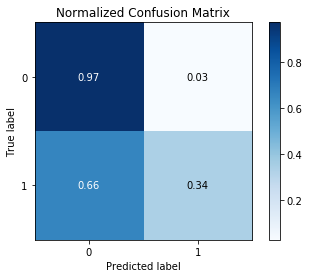

Wall time: 611 ms


In [141]:
%%time
fit_pred(LogisticRegression())

### 3-2. AdaBoostClassifier

정확도는 0.901
roc 스코어는 0.908
#####################################################
<Confusion Matrix>


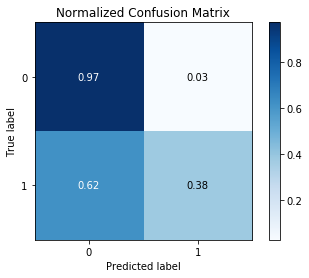

Wall time: 1.92 s


In [142]:
%%time
fit_pred(AdaBoostClassifier(random_state = 123))

### 3-3. XGBoostClassifier

정확도는 0.903
roc 스코어는 0.92
#####################################################
<Confusion Matrix>


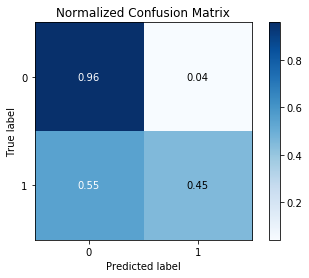

Wall time: 4.56 s


In [143]:
%%time
fit_pred(XGBClassifier(random_state = 123))

### 3-4. LGBMClassifier

정확도는 0.906
roc 스코어는 0.924
#####################################################
<Confusion Matrix>


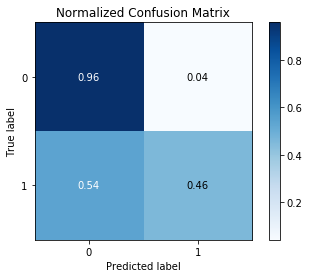

Wall time: 683 ms


In [144]:
%%time
fit_pred(LGBMClassifier(random_state = 123))

### 3-5. GradientBoosingClassifier

정확도는 0.905
roc 스코어는 0.921
#####################################################
<Confusion Matrix>


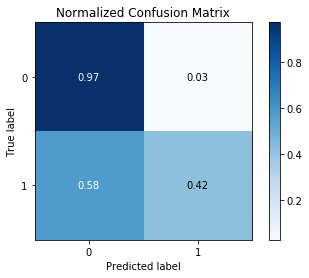

Wall time: 5.39 s


In [145]:
%%time
fit_pred(GradientBoostingClassifier(random_state = 123))

### 3-6. MLPClassifier

정확도는 0.901
roc 스코어는 0.91
#####################################################
<Confusion Matrix>


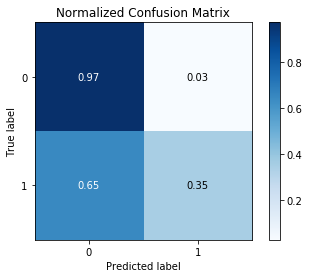

Wall time: 47.8 s


In [146]:
%%time
fit_pred(MLPClassifier(random_state = 123))

### 3-7. RandomForestClassifier

정확도는 0.903
roc 스코어는 0.914
#####################################################
<Confusion Matrix>


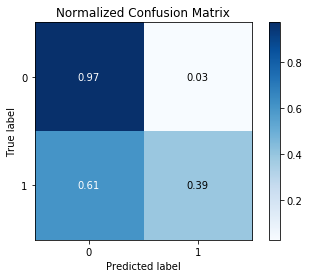

Wall time: 4.01 s


In [147]:
%%time
fit_pred(RandomForestClassifier(random_state = 123))

### 3-8. DecisionTreeClassifier

정확도는 0.87
roc 스코어는 0.7
#####################################################
<Confusion Matrix>


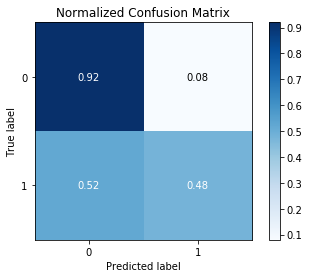

Wall time: 472 ms


In [148]:
%%time
fit_pred(DecisionTreeClassifier(random_state = 123))

### 3-9. SGDClassifier

정확도는 0.901
roc 스코어는 0.888
#####################################################
<Confusion Matrix>


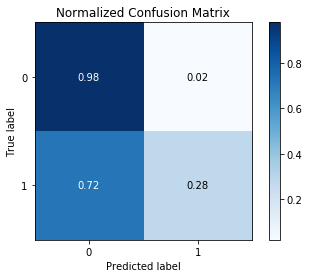

Wall time: 991 ms


In [167]:
%%time
fit_pred(SGDClassifier(random_state = 123, loss = 'modified_huber'))

### 3-10. LinearDiscriminantAnalysis

정확도는 0.897
roc 스코어는 0.901
#####################################################
<Confusion Matrix>


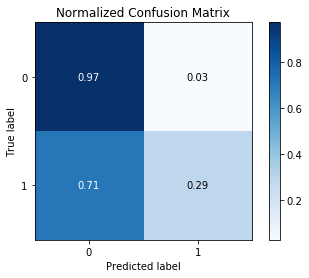

Wall time: 385 ms


In [168]:
%%time
fit_pred(LinearDiscriminantAnalysis())

### 3-11. ExtraTreeClassifier

정확도는 0.897
roc 스코어는 0.888
#####################################################
<Confusion Matrix>


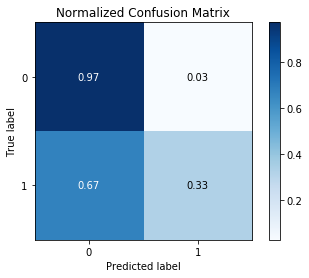

Wall time: 4.39 s


In [151]:
%%time
fit_pred(ExtraTreesClassifier(random_state = 123))

### 3-12. GaussianNB

정확도는 0.814
roc 스코어는 0.779
#####################################################
<Confusion Matrix>


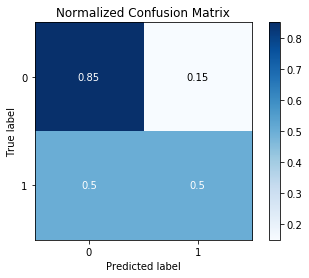

Wall time: 263 ms


In [152]:
%%time
fit_pred(GaussianNB())

### 3-13. KNeighborsClassifer

정확도는 0.893
roc 스코어는 0.827
#####################################################
<Confusion Matrix>


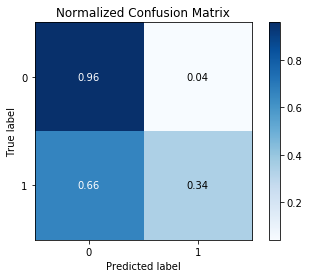

Wall time: 27.7 s


In [153]:
%%time
fit_pred(KNeighborsClassifier())

### 최종 모델은 총 3개를 선정했습니다.

#### (1) XGBClassifier
#### (2) LGBMClassifier
#### (3) GradientBoosingClassifier

## 4. 파라미터 튜닝

In [100]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2020)

In [141]:
def grid_model(model):
    gr_cv_model = GridSearchCV(model, cv = kf, param_grid = params, n_jobs = -1,scoring = 'roc_auc')
    gr_cv_model.fit(X, Y)
    score = gr_cv_model.best_score_
    cv_params = gr_cv_model.best_params_
    cv_est = gr_cv_model.best_estimator_
    print(score)
    print(cv_params)
    return cv_est

### 4-1. XGB

In [171]:
params = {'eta' : [0.01, 0.05,0.1, 0.15,0.2], 'max_depth' : [3,4,5,6,7], 'subsample' : [0.6, 0.7, 0.8, 0.9],
            'gamma': [0.01,0.1,0.001],'n_estimators':[5,10,20,100]}

In [172]:
%%time
grid_xgb = grid_model(XGBClassifier(random_state = 777))
xgb_pred = grid_xgb.predict_proba(test)[:, 1]

0.9239213797037698
{'eta': 0.1, 'gamma': 0.001, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Wall time: 2h 31min 9s


### 4-2. LGBM

In [178]:
import gc

In [179]:
gc.collect()

6125

In [182]:
params = {'n_estimators' : [50, 100,200, 300,400,500],'learning_rate' : [0.001,0.005, 0.01, 0.05, 0.1, 0.2],
              'max_depth' : [3,4,5,6,7],'num_leaves' : [20,30,40,100]}

In [183]:
%%time
grid_lgbm = grid_model(LGBMClassifier(random_state = 777))
lgbm_pred = grid_lgbm.predict_proba(test)[:, 1]

0.9235386585276834
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 20}
Wall time: 39min 34s


### 4-3. GradientBoostingClassifier

In [184]:
params = {'learning_rate' : [0.001,0.005,0.01,0.05,0.1,0.15,0.2], 'n_estimators' : [1000,500,300,200,100,50],
            'subsample' : [0.5,0.6,0.7,0.8,0.9,1]}

In [185]:
%%time
grid_gbc = grid_model(GradientBoostingClassifier(random_state = 777))
gbc_pred = grid_gbc.predict_proba(test)[:, 1]

0.9212716745918248
{'learning_rate': 0.05, 'n_estimators': 1000, 'subsample': 0.9}
Wall time: 2h 44min 44s


### Voting 활용

In [187]:
voting = VotingClassifier(estimators = [('xgb',grid_xgb), ('lgbm', grid_lgbm), ('gbc', grid_gbc)], voting = 'soft')
voting.fit(X, Y)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, eta=0.1,
                                            gamma=0.001, gpu_id=-1,
                                            importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.100000001,
                                            max_delta_step=0, max_depth=7,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n...
                                                         max_leaf_nodes=None,
                                    

In [188]:
roc_voting_pred = voting.predict_proba(test)[:, 1]

## 최종 roc_auc_score 비교

In [195]:
print('XGB의 roc_auc_score = {}'.format(np.round(roc_auc_score(submission.y, xgb_pred),4)))
print('LGBM의 roc_auc_score = {}'.format(np.round(roc_auc_score(submission.y, lgbm_pred),4)))
print('GBC의 roc_auc_score = {}'.format(np.round(roc_auc_score(submission.y, gbc_pred),4)))
print('VOTING의 roc_auc_score = {}'.format(np.round(roc_auc_score(submission.y, roc_voting_pred),4)))
print('3개 모델 gmean의 roc_auc_score = {}'.format(np.round(roc_auc_score(submission.y, gmean([roc_voting_pred, gbc_pred, xgb_pred, lgbm_pred], axis = 0)), 4)))

XGB의 roc_auc_score = 0.9532
LGBM의 roc_auc_score = 0.9412
GBC의 roc_auc_score = 0.935
VOTING의 roc_auc_score = 0.9454
3개 모델 gmean의 roc_auc_score = 0.945


## 단일 XGBClassifier의 roc_auc_score의 성능이 제일 좋았다.

# Finished!